## Feature Selection

We will perform feature selection to get the best features to build the model. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

Making use of our combined dataset, we will engineer new features in addition to those previously engineered in the EDA phase. 


In [2]:
df=pd.read_csv("combined_dataset.csv")
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_offpeak,mean_midpeak,mean_peak
0,0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.124338,0.07316,0.103794
1,0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.124338,0.07316,0.103794
2,0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794
3,0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794
4,0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794


In [3]:
# shape of dataframe
df.shape

(175149, 36)

In [4]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_offpeak,mean_midpeak,mean_peak
count,1.751490e+05,1.751490e+05,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.00000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,1868.343884,1399.782380,0.967028,63.074649,0.137287,0.050487,43.130229,152.789831,24.566829,24.564223,1.29230,189.245305,4.998276,18.134896,0.097077,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434,0.142331,0.028270,0.052059
std,5.735413e+05,1.629400e+05,64376.741908,2387.560169,3248.331276,5.109025,66.143996,0.024625,0.049036,4.486779,341.426992,20.234481,20.233588,0.70978,311.846765,1.611801,13.535809,0.296064,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250,0.022515,0.035800,0.049878
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.00000,50.710000,4.000000,12.500000,0.000000,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000,0.124430,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,1112.610000,314.000000,0.000000,18.790000,0.143166,0.084138,44.311378,37.390000,21.640000,21.640000,1.00000,112.500000,5.000000,13.856000,0.000000,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000,0.147631,0.000000,0.084509
75%,4.076300e+04,0.000000e+00,3383.000000,2400.350000,1745.000000,0.000000,131.030000,0.146348,0.098837,44.311378,193.990000,29.880000,29.880000,1.00000,243.000000,6.000000,19.180000,0.000000,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389,0.150415,0.072831,0.102479
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.00000,24570.650000,13.000000,320.000000,1.000000,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221,0.278098,0.102951,0.196275


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

Engineering a feature that accounts for the difference between off peak energy price and off peak power price in January and December. 

In [6]:
comb_df=pd.DataFrame(df.groupby('id')['price_off_peak_var'].last()-df.groupby('id')['price_off_peak_var'].first())
comb_df.rename(columns={'price_off_peak_var': 'offpeak_diff_dec_january_energy'}, inplace=True)
comb_df1=pd.DataFrame(df.groupby('id')['price_off_peak_fix'].last()-df.groupby('id')['price_off_peak_fix'].first())
comb_df1.rename(columns={'price_off_peak_fix': 'offpeak_diff_dec_january_power'}, inplace=True)
comb=comb_df.join(comb_df1)
comb.head()

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
id,,
0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
00114d74e963e47177db89bc70108537,-0.003994,-0.000001
0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000


In [16]:
df=df.set_index('id')
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_offpeak,mean_midpeak,mean_peak
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.124338,0.07316,0.103794
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.124338,0.07316,0.103794
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794


In [15]:
comb.head()

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
id,,
0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
00114d74e963e47177db89bc70108537,-0.003994,-0.000001
0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000


In [17]:
# Join both dataframes 
final_df=df.join(comb)
final_df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,mean_offpeak,mean_midpeak,mean_peak,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.124338,0.07316,0.103794,-0.006192,0.162916
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0.124338,0.07316,0.103794,-0.006192,0.162916
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794,-0.006192,0.162916
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794,-0.006192,0.162916
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,0.124338,0.07316,0.103794,-0.006192,0.162916


For the sake of feature selection, we will change the data type of certain independent variables in our dataframe. From our data description, we see that churn is labeled an interger variable but should be more properly described as nominal-categorical.

In [19]:
#Changing the data type of features from numeric to categorical
final_df['churn']=final_df['churn'].astype('str')
final_df['has_gas']=final_df['has_gas'].astype('str')
final_df['channel_sales']=final_df['channel_sales'].astype('str')
final_df['origin_up']=final_df['origin_up'].astype('str')

In [21]:
#dropping date columns 
final_df=final_df.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date'])
final_df.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'mean_offpeak', 'mean_midpeak', 'mean_peak',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power'],
      dtype='object')

We will also use ordinal encoding on the other categorical variables. 

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
# Ordinal encoding for categorical variable
oe=OrdinalEncoder()
final_df[['channel_sales', 'has_gas', 'origin_up']]=oe.fit_transform(final_df[['channel_sales', 'has_gas', 'origin_up']])

Dropping constant features using variance threshold 

In [77]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif


In [80]:
# Getting all float and categorical variables 
float_cols=[cols for cols in final_df.columns if final_df[cols].dtype=='float64' or final_df[cols].dtype=='int64']
cat_cols=[cols for cols in final_df.columns if final_df[cols].dtype=='object']


In [28]:
var_thresh= VarianceThreshold(threshold=0.10)
var_thresh.fit_transform(final_df[float_cols])
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False, False,  True])

In [30]:
# Columns with high variance 
final_df[float_cols].columns[var_thresh.get_support()]


Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'offpeak_diff_dec_january_power'],
      dtype='object')

In [31]:
drop_cols=[]
for cols in final_df[float_cols]:
    if cols not in final_df[float_cols].columns[var_thresh.get_support()]:
        drop_cols.append(cols)
print(drop_cols)

['forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'mean_offpeak', 'mean_midpeak', 'mean_peak', 'offpeak_diff_dec_january_energy']


In [35]:
# Drop low variance columns 
final_df=final_df.drop(columns=drop_cols, axis=1)

In [36]:
final_df.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'offpeak_diff_dec_january_power'],
      dtype='object')

In [102]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [68]:
# Independent variables 
indep_var=[]
for cols in final_df.columns:
    if cols != 'churn':
        indep_var.append(cols)
print(indep_var)


['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'offpeak_diff_dec_january_power']


In [69]:
# Creating a dataframe for independent variables 
ind_df=final_df[indep_var]







In [71]:
ind_df=ind_df.drop(columns=['id'])
X=ind_df.iloc[:, :]
X.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_power
0,4.0,22034,0,3084,729.06,425,0.0,138.95,40.606701,0.0,40.78,43.08,43.08,1,81.42,6,2.0,17.25,40.565969,24.339581,16.226389,0.162916
1,4.0,22034,0,3084,729.06,425,0.0,138.95,40.606701,0.0,40.78,43.08,43.08,1,81.42,6,2.0,17.25,40.565969,24.339581,16.226389,0.162916
2,4.0,22034,0,3084,729.06,425,0.0,138.95,40.606701,0.0,40.78,43.08,43.08,1,81.42,6,2.0,17.25,40.728885,24.437330,16.291555,0.162916
3,4.0,22034,0,3084,729.06,425,0.0,138.95,40.606701,0.0,40.78,43.08,43.08,1,81.42,6,2.0,17.25,40.728885,24.437330,16.291555,0.162916
4,4.0,22034,0,3084,729.06,425,0.0,138.95,40.606701,0.0,40.78,43.08,43.08,1,81.42,6,2.0,17.25,40.728885,24.437330,16.291555,0.162916


In [48]:
final_df=final_df.reset_index()
y=final_df['churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: object

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Changing the data type of categorical variables previously encoded.

In [73]:
final_df['channel_sales']=final_df['channel_sales'].astype('str')
final_df['has_gas']=final_df['has_gas'].astype('str')
final_df['origin_up']=final_df['origin_up'].astype('str')

We can use the chi2 test of independence to test for independence between the categorical variables and churn. 

In [74]:
select = SelectKBest(score_func=chi2, k='all')
select.fit_transform(X[['channel_sales', 'has_gas', 'origin_up']], y)
select.scores_



array([216.2634535 ,  83.2508129 , 400.85062805])

From what we can see, all variables have a great score against churn and so will be used to build the model.

For continuous variables, we will make use of ANOVA-analysis of variance to explore the strength of dependence between the continuous and nominal variable ('churn').

In [82]:
# First we get the continuous variables to fit into KBest
col_cont=[cols for cols in X.columns if X[cols].dtype=='float64' or X[cols].dtype=='int64']
col_cont

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix',
 'offpeak_diff_dec_january_power']

In [83]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit_transform(X[col_cont], y)
fs.scores_


array([3.70067003e+02, 2.51908893e+02, 3.59160153e+02, 2.90705863e+01,
       1.13022107e+00, 5.13054083e+01, 3.43723285e+02, 3.87457080e+01,
       4.21806510e-01, 1.62142572e+03, 1.62301337e+03, 3.82667340e+01,
       2.96034173e+02, 9.65253650e+02, 1.62162566e+02, 4.85282035e+01,
       3.85306288e+02, 3.46686241e+02, 1.20728663e+00])

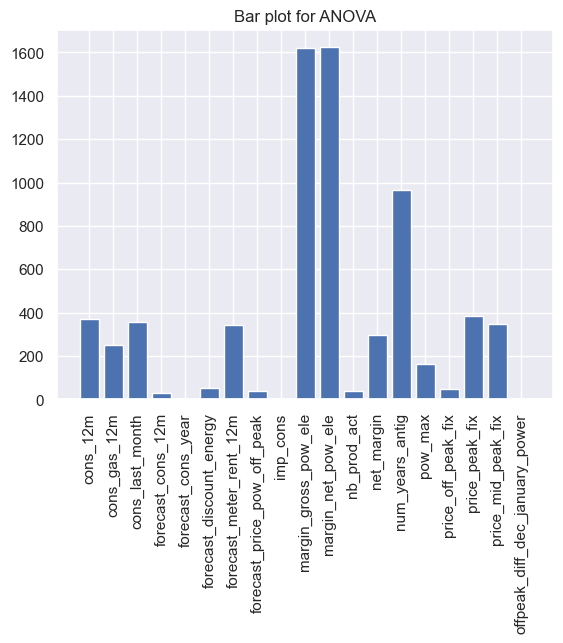

In [88]:
# Visualizing ANOVA scores using a bar plot 
plt.bar(X[col_cont].columns, fs.scores_)
plt.xticks(rotation=90)
plt.title('Bar plot for ANOVA');

* From our plot, we can see that the gross margin on power subscription and net margin have the highest associations. From our EDA, it was observed that these features exhibited high multicollinearity because they had practically the same values. For tht reason, we will utilize only one of the two in model building. 

* Consumption in the last month and consumption in the last 12 months also exhibited multicollinearity, for the sake of model building, we will utilize the consumption in the last 12 months. 

* Peak power price and mid peak power price also had strong correlation coefficients. Because peak fix has a slightly higher association via ANOVA, we will pick it.

At the end of feature selection, we have decided to pick the following independent variables:
* CHANNEL_SALES
* HAS_GAS
* ORIGIN_UP
* MARGIN_NET_POW_ELE
* CONS_12M
* PRICE_PEAK_FIX
* NUM_YEARS_ANTIG
* FORECAST_METER_RENT_12M

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score

In [93]:
# Creating a list for columns to drop
cols_drop=[]
model_columns= ['channel_sales', 'has_gas', 'origin_up', 'margin_net_pow_ele', 'cons_12m', 'price_peak_fix', 'num_years_antig', 'forecast_meter_rent_12m']
for cols in X.columns:
    if cols not in model_columns:
        cols_drop.append(cols)
cols_drop

['cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'nb_prod_act',
 'net_margin',
 'pow_max',
 'price_off_peak_fix',
 'price_mid_peak_fix',
 'offpeak_diff_dec_january_power']

In [94]:
X=X.drop(columns=cols_drop)


In [96]:
X.head()

,channel_sales,cons_12m,forecast_meter_rent_12m,has_gas,margin_net_pow_ele,num_years_antig,origin_up,price_peak_fix
0,4.0,22034,138.95,0.0,43.08,6,2.0,24.339581
1,4.0,22034,138.95,0.0,43.08,6,2.0,24.339581
2,4.0,22034,138.95,0.0,43.08,6,2.0,24.437330
3,4.0,22034,138.95,0.0,43.08,6,2.0,24.437330
4,4.0,22034,138.95,0.0,43.08,6,2.0,24.437330


In [98]:
X_train.head()

,channel_sales,cons_12m,forecast_meter_rent_12m,has_gas,margin_net_pow_ele,num_years_antig,origin_up,price_peak_fix
132901,0.0,2554,16.40,0.0,33.12,6,2.0,0.00000
51076,0.0,8110,16.19,0.0,31.53,6,2.0,0.00000
63357,4.0,38535,118.35,0.0,15.10,4,4.0,24.43733
90446,4.0,9079,9.47,0.0,16.92,6,2.0,0.00000
168626,2.0,18780,131.76,0.0,36.52,4,3.0,24.43733


## Model Building 

We will utilize a random forest classifier and see if tuning is necessary to achieve higher accuracy. We will use accuracy as our model evaluation metric for now. 

In [101]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
preds=rf.predict(X_test)
print('The accuracy score of the model is', accuracy_score(y_test, preds))

The accuracy score of the model is 0.999515570934256


We were able to attain a 99% accuracy on our model without hyperparameter tuning using a random forest classifier. 

In [106]:
# Generate a confusion matrix 
confusion_matrix(y_test, preds)

array([[52129,     5],
       [   23,  5643]], dtype=int64)

Our confusion matrix has great values for the True Positives and True Negatives which we are most concerned about.

We need to define a metric that would fit the model being produced. For this model, we are very much interested in how much of our predictions are correct. That is, out of the client companies we predicted to leave, how many actually exited the service. This is computed using the precision score. We might also be interested in knowing how of the exited customers we correctly predicted, this is computed using the recall score. We can thus create an f beta score to accommodate both metrics. We would use a beta of 0.3, since we are most interested in precision.

In [117]:
print('F-beta score for random forest model:', fbeta_score(y_test, preds, beta=0.3, pos_label='0'))


F-beta score for random forest model: 0.9995874678902246
